In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures

In [0]:
return_table_name=dbutils.notebook.run("notebook_modeling", 360)
print(return_table_name)
global_temp_db = spark.conf.get("spark.sql.globalTempDatabase")

x_train = spark.sql( "select * from " + global_temp_db + "." + 'x_train_out').toPandas()

x_test = spark.sql( "select * from " + global_temp_db + "." + 'x_test_out').toPandas()

y_train = spark.sql( "select * from " + global_temp_db + "." + 'y_train_out').toPandas()

y_test = spark.sql( "select * from " + global_temp_db + "." + 'y_test_out').toPandas()

y_test_out


In [0]:
storage_account_name = "chakssa"
storage_account_access_key = "igtnp8QaR6wyg8QqSrly+MZlYoTtXn7mQxYUbkYUyJKTTtuFtbe6A8GT+IrB/jurKRzR9KtIPwB5+AStruAw/A=="
container_name = 'wendy'
mount_name = "/mnt/chakssa/wendy"

# Mount the storage account
# dbutils.fs.mount(
#   source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net",
#   mount_point = mount_name,
#   extra_configs = {f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_access_key}
# )

model_path = "/dbfs/mnt/chakssa/wendy/gbc.pkl"
with open(model_path, 'rb') as file:
    gbc_best = pickle.load(file)

model_path = "/dbfs/mnt/chakssa/wendy/dtree.pkl"
with open(model_path, 'rb') as file:
    dtree = pickle.load(file)

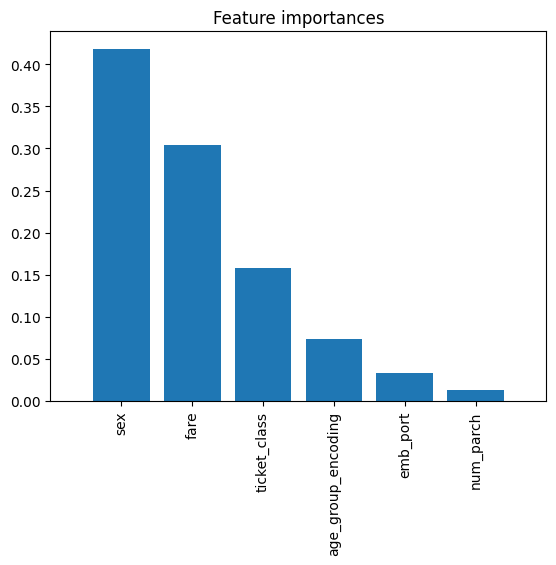

In [0]:
importances = gbc_best.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

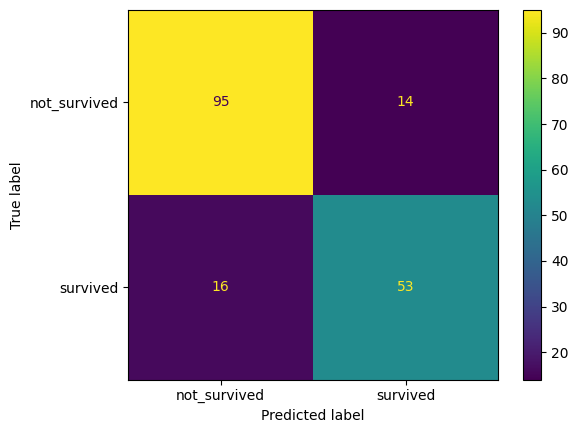

In [0]:
cm = confusion_matrix(y_true=y_test, y_pred=gbc_best.predict(x_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['not_survived', 'survived']) 
cm_display.plot()
# sns.heatmap(cm, annot=True, cmap='Blues')

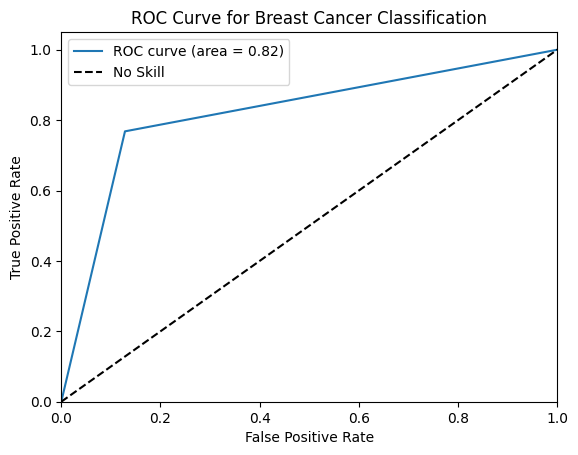

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, gbc_best.predict(x_test))
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

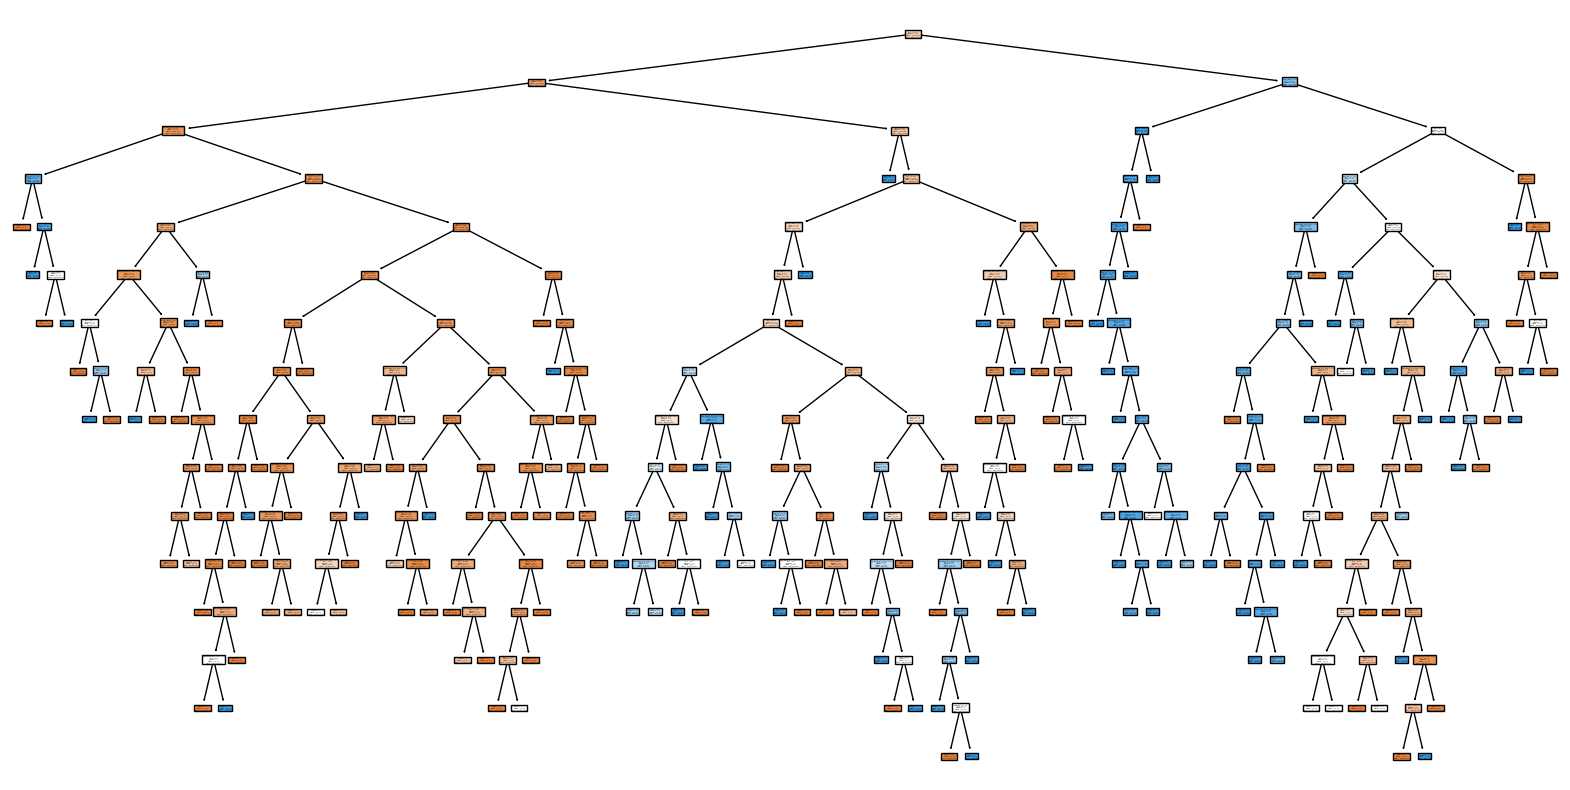

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=['ticket_class', 'sex', 'age_group_encoding', 'num_parch', 'fare', 'emb_port'], class_names=['not_survived', 'survived'])
plt.show()